<a href="https://colab.research.google.com/github/Sara-Noor24/HCI_Prototype/blob/main/HCI_LIZAPIYA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [66]:
import pandas as pd
import pyarrow.parquet as pq
import os
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sb

# from google.colab import drive
# drive.mount(r'/content/drive')

In [67]:

# Define the file path
HCI_path_neurotrax = '/content/drive/My Drive/PHD/HCI/Neurotrax Export Original.xlsx'
#HCI_path_neurotrax = 'Neurotrax Export Original.xlsx'


Neurotrax = pd.read_excel(HCI_path_neurotrax, skiprows=1)
Neurotrax.head(100)

,Patient ID,Order ID,Start Date,Start Time,End Date,End Time,Date of Birth,Primary Language,Ethnicity / Race,Country of Origin,...,AC40000,RT40000,SD40000,CS40000,OE40000,CE40000,CR40000,Unnamed: 153,Unnamed: 154,Unnamed: 155
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,361000004.0,148764.0,2012-04-16,11:33:09,2012-04-16,12:06:10,1978-06-16,1.0,1.0,1.0,...,-,-,-,-,-,-,-,NaN,NaN,NaN
2,361000004.0,258354.0,2014-08-18,11:26:10,2014-08-18,12:04:26,1978-06-16,1.0,1.0,1.0,...,-,-,-,-,-,-,-,NaN,NaN,NaN
3,361000009.0,350206.0,2017-02-22,08:01:52,2017-02-22,08:39:32,1936-04-16,1.0,1.0,1.0,...,-,-,-,-,-,-,-,NaN,NaN,4725.0
4,361000009.0,387060.0,2018-03-01,08:49:08,2018-03-01,09:35:52,1936-04-16,1.0,1.0,1.0,...,-,-,-,-,-,-,-,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,361000108.0,180729.0,2012-08-29,14:28:18,2012-08-29,15:14:58,1970-05-05,1.0,1.0,1.0,...,-,-,-,-,-,-,-,NaN,NaN,NaN
96,361000108.0,218850.0,2013-09-17,17:03:22,2013-09-17,17:46:03,1970-05-05,1.0,1.0,1.0,...,-,-,-,-,-,-,-,NaN,NaN,NaN
97,361000108.0,268901.0,2014-12-03,11:27:29,2014-12-03,12:12:36,1970-05-05,1.0,1.0,1.0,...,-,-,-,-,-,-,-,NaN,NaN,NaN
98,361000108.0,313778.0,2016-02-22,11:06:39,2016-02-22,11:55:52,1970-05-05,1.0,1.0,1.0,...,-,-,-,-,-,-,-,NaN,NaN,NaN


In [68]:
print(Neurotrax.columns)


Index(['Patient ID', 'Order ID', 'Start Date', 'Start Time', 'End Date',
       'End Time', 'Date of Birth', 'Primary Language', 'Ethnicity / Race',
       'Country of Origin',
       ...
       'AC40000', 'RT40000', 'SD40000', 'CS40000', 'OE40000', 'CE40000',
       'CR40000', 'Unnamed: 153', 'Unnamed: 154', 'Unnamed: 155'],
      dtype='object', length=156)


In [69]:
marital_status_counts = Neurotrax['Marital Status'].value_counts(normalize=True) * 100
print(marital_status_counts)


9.0     53.446844
8.0     29.019934
10.0    10.166113
11.0     7.367110
Name: Marital Status, dtype: float64


In [70]:
# Define the file path
HCI_path_neurotrax_Normative = '/content/drive/My Drive/PHD/HCI/Neurotrax_HCI_data.xlsx'

# Read the Excel file
Neurotrax_Normative = pd.read_excel(HCI_path_neurotrax_Normative)
Neurotrax_Normative.head(100)

,Patient ID,Order ID,Start Date,Start Time,End Date,End Time,Years of Education,Highest Degree,Diagnosis 1,Score,Memory,Executive Function,Visual Spatial,Verbal Function,Attention,Information Processing Speed,Motor Skills
0,361000004,148764,2012-04-16,11:33:09,2012-04-16,12:06:10,13,2,53,103.7,99.1,111.2,120.5,92.6,105.9,98.7,98.1
1,361000004,258354,2014-08-18,11:26:10,2014-08-18,12:04:26,13,2,53,75.4,66.3,74.5,81.8,99.7,71.8,60,73.3
2,361000009,350206,2017-02-22,08:01:52,2017-02-22,08:39:32,15,3,4,109.8,110.4,113.4,115.9,103.1,106.2,-,-
3,361000009,387060,2018-03-01,08:49:08,2018-03-01,09:35:52,15,3,4,102.3,97.8,100,109.8,77.4,103.9,112.7,114.2
4,361000009,427640,2019-04-30,12:59:03,2019-04-30,13:48:26,15,3,83,97.1,100.1,98.3,87.9,65.3,110.5,103.5,114
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,361000108,218850,2013-09-17,17:03:22,2013-09-17,17:46:03,14,2,53,86.2,75.5,83.6,80.8,95.7,94.5,82.7,90.6
96,361000108,268901,2014-12-03,11:27:29,2014-12-03,12:12:36,14,2,53,78.4,67.8,76.7,100.7,91.5,67.4,68.2,76.7
97,361000108,313778,2016-02-22,11:06:39,2016-02-22,11:55:52,14,2,53,76.5,83.7,79.8,76,104.1,61.7,66,63.9
98,361000108,350914,2017-02-28,12:44:44,2017-02-28,13:29:31,14,2,53,76.6,74.6,75.6,80.8,78.9,71,83.4,72.3


In [71]:
print(Neurotrax_Normative.columns)

Index(['Patient ID', 'Order ID', 'Start Date', 'Start Time', 'End Date',
       'End Time', 'Years of Education', 'Highest Degree', 'Diagnosis 1',
       'Score', 'Memory', 'Executive Function', 'Visual Spatial',
       'Verbal Function', 'Attention', 'Information Processing Speed',
       'Motor Skills'],
      dtype='object')


In [72]:
# Merge Neurotrax_Normative with the 'Marital Status' column from Neurotrax
merged_df = pd.merge(Neurotrax_Normative, Neurotrax[['Patient ID', 'Marital Status']], on='Patient ID', how='left')

# 'how='left'' ensures all rows from Neurotrax_Normative are retained
# while matching 'Marital Status' based on 'Patient ID' from Neurotrax

merged_df.head()


,Patient ID,Order ID,Start Date,Start Time,End Date,End Time,Years of Education,Highest Degree,Diagnosis 1,Score,Memory,Executive Function,Visual Spatial,Verbal Function,Attention,Information Processing Speed,Motor Skills,Marital Status
0,361000004,148764,2012-04-16,11:33:09,2012-04-16,12:06:10,13,2,53,103.7,99.1,111.2,120.5,92.6,105.9,98.7,98.1,9.0
1,361000004,148764,2012-04-16,11:33:09,2012-04-16,12:06:10,13,2,53,103.7,99.1,111.2,120.5,92.6,105.9,98.7,98.1,9.0
2,361000004,258354,2014-08-18,11:26:10,2014-08-18,12:04:26,13,2,53,75.4,66.3,74.5,81.8,99.7,71.8,60,73.3,9.0
3,361000004,258354,2014-08-18,11:26:10,2014-08-18,12:04:26,13,2,53,75.4,66.3,74.5,81.8,99.7,71.8,60,73.3,9.0
4,361000009,350206,2017-02-22,08:01:52,2017-02-22,08:39:32,15,3,4,109.8,110.4,113.4,115.9,103.1,106.2,-,-,8.0


In [73]:
# Assuming merged_df contains your DataFrame with 'Patient ID' column

# Drop duplicate 'Patient ID' entries, keeping only the first occurrence
unique_merged_df = merged_df.drop_duplicates(subset=['Patient ID'])

# Now, perform the operations like correlation on this unique DataFrame
unique_merged_df.head()

,Patient ID,Order ID,Start Date,Start Time,End Date,End Time,Years of Education,Highest Degree,Diagnosis 1,Score,Memory,Executive Function,Visual Spatial,Verbal Function,Attention,Information Processing Speed,Motor Skills,Marital Status
0,361000004,148764,2012-04-16,11:33:09,2012-04-16,12:06:10,13,2,53,103.7,99.1,111.2,120.5,92.6,105.9,98.7,98.1,9.0
4,361000009,350206,2017-02-22,08:01:52,2017-02-22,08:39:32,15,3,4,109.8,110.4,113.4,115.9,103.1,106.2,-,-,8.0
13,361000016,258829,2014-08-22,08:41:08,2014-08-22,09:43:24,10,1,11,82.8,67.4,79.3,99.6,108,71.8,80.1,73.6,8.0
14,361000017,186108,2012-10-25,14:33:56,2012-10-25,15:10:04,16,4,7,102.5,106.6,91.5,113.6,-,100.3,96.9,106.4,9.0
23,361000028,252015,2014-06-11,16:07:54,2014-06-11,17:10:47,13,2,53,-,-,-,-,-,66.2,-,-,8.0


In [74]:
marital_status_counts = unique_merged_df['Marital Status'].value_counts(normalize=True) * 100
print(marital_status_counts)

9.0     46.288146
8.0     36.282277
10.0     9.198944
11.0     8.230634
Name: Marital Status, dtype: float64


In [75]:
# Assuming unique_merged_df contains the DataFrame with 'Marital Status' column

# Rename 'Marital Status' column without spaces
unique_merged_df.rename(columns={'Marital Status': 'Marital_Status'}, inplace=True)
unique_merged_df.rename(columns={'Executive Function': 'Executive_Function'}, inplace=True)
unique_merged_df.rename(columns={'Visual Spatial': 'Visual_Spatial'}, inplace=True)
unique_merged_df.rename(columns={'Verbal Function': 'Verbal_Function'}, inplace=True)
unique_merged_df.rename(columns={'Motor Skills': 'Motor_Skills'}, inplace=True)
unique_merged_df.rename(columns={'Information Processing Speed': 'Information_Processing_Speed'}, inplace=True)

<ipython-input-75-663c6943a8d7>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  unique_merged_df.rename(columns={'Marital Status': 'Marital_Status'}, inplace=True)
<ipython-input-75-663c6943a8d7>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  unique_merged_df.rename(columns={'Executive Function': 'Executive_Function'}, inplace=True)
<ipython-input-75-663c6943a8d7>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  unique_merged_df.ren

In [76]:
marital_status_counts = unique_merged_df['Marital_Status'].value_counts(normalize=True) * 100
print(marital_status_counts)

9.0     46.288146
8.0     36.282277
10.0     9.198944
11.0     8.230634
Name: Marital_Status, dtype: float64


In [77]:
#import statsmodels.api as sm
#from statsmodels.formula.api import ols

# Assuming merged_df contains the combined DataFrame with 'Marital Status' and continuous columns

# Fit ANOVA model for 'Score' and 'Marital Status'
#model = ols('Score ~ C(Marital_Status)', data=unique_merged_df).fit()
#anova_table = sm.stats.anova_lm(model, typ=2)

#print(anova_table)


In [78]:
unique_merged_df.head(100)

,Patient ID,Order ID,Start Date,Start Time,End Date,End Time,Years of Education,Highest Degree,Diagnosis 1,Score,Memory,Executive_Function,Visual_Spatial,Verbal_Function,Attention,Information_Processing_Speed,Motor_Skills,Marital_Status
0,361000004,148764,2012-04-16,11:33:09,2012-04-16,12:06:10,13,2,53,103.7,99.1,111.2,120.5,92.6,105.9,98.7,98.1,9.0
4,361000009,350206,2017-02-22,08:01:52,2017-02-22,08:39:32,15,3,4,109.8,110.4,113.4,115.9,103.1,106.2,-,-,8.0
13,361000016,258829,2014-08-22,08:41:08,2014-08-22,09:43:24,10,1,11,82.8,67.4,79.3,99.6,108,71.8,80.1,73.6,8.0
14,361000017,186108,2012-10-25,14:33:56,2012-10-25,15:10:04,16,4,7,102.5,106.6,91.5,113.6,-,100.3,96.9,106.4,9.0
23,361000028,252015,2014-06-11,16:07:54,2014-06-11,17:10:47,13,2,53,-,-,-,-,-,66.2,-,-,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1730,361000408,145431,2012-03-15,08:36:22,2012-03-15,09:10:09,15,4,4,112.5,93.1,119.2,105.4,114.6,112.9,111,131,8.0
1746,361000410,148625,2012-04-13,14:26:58,2012-04-13,14:55:45,14,2,39,94.8,112.7,98.9,98.6,62.9,100.7,-,-,9.0
1747,361000411,139595,2012-01-19,10:21:46,2012-01-19,11:14:14,14,8,53,82,74.8,90,80.8,91.5,90.3,76.6,69.8,9.0
1828,361000412,265579,2014-10-30,10:35:52,2014-10-30,11:07:21,13,2,53,99.1,104.7,93,88.1,103.3,93.9,100.3,110.4,9.0


In [79]:
#import statsmodels.api as sm
#from statsmodels.formula.api import ols

# Perform ANOVA for 'Score' and 'Marital_Status' in unique_merged_df
#model = ols('Score ~ C(Marital_Status)', data=unique_merged_df).fit()
#anova_table = sm.stats.anova_lm(model, typ=2)

# View the ANOVA results
#print(anova_table)


In [80]:
# Assuming DataFrame is named df
mapping = {8: 'Single', 9: 'Married', 10: 'Widowed', 11: 'Divorced'}
unique_merged_df['Marital_Status'] = unique_merged_df['Marital_Status'].replace(mapping)


<ipython-input-80-2bd695008fb4>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  unique_merged_df['Marital_Status'] = unique_merged_df['Marital_Status'].replace(mapping)


In [81]:
#import seaborn as sns
#import matplotlib.pyplot as plt

# Assuming 'Score' and 'Marital_Status' columns exist in unique_merged_df
#sns.boxplot(x='Marital_Status', y='Score', data=unique_merged_df)
#plt.xlabel('Marital Status')
#plt.ylabel('Score')
#plt.title('Distribution of Score by Marital Status')
#plt.show()


In [82]:


# Assuming unique_merged_df contains the DataFrame with 'Score' column

# Convert 'Score' column to numeric, coercing errors to NaN
unique_merged_df['Score'] = pd.to_numeric(unique_merged_df['Score'], errors='coerce')
unique_merged_df['Memory'] = pd.to_numeric(unique_merged_df['Memory'], errors='coerce')
unique_merged_df['Executive_Function'] = pd.to_numeric(unique_merged_df['Executive_Function'], errors='coerce')
unique_merged_df['Visual_Spatial'] = pd.to_numeric(unique_merged_df['Visual_Spatial'], errors='coerce')
unique_merged_df['Verbal_Function'] = pd.to_numeric(unique_merged_df['Verbal_Function'], errors='coerce')
unique_merged_df['Attention'] = pd.to_numeric(unique_merged_df['Attention'], errors='coerce')
unique_merged_df['Information_Processing_Speed'] = pd.to_numeric(unique_merged_df['Information_Processing_Speed'], errors='coerce')
unique_merged_df['Motor_Skills'] = pd.to_numeric(unique_merged_df['Motor_Skills'], errors='coerce')
# Verify the data type after conversion
print(unique_merged_df['Score'].dtype)






float64


<ipython-input-82-f9a2229bc352>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  unique_merged_df['Score'] = pd.to_numeric(unique_merged_df['Score'], errors='coerce')
<ipython-input-82-f9a2229bc352>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  unique_merged_df['Memory'] = pd.to_numeric(unique_merged_df['Memory'], errors='coerce')
<ipython-input-82-f9a2229bc352>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value i

In [83]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

# List of continuous variables
continuous_vars = ['Score', 'Memory', 'Executive_Function', 'Visual_Spatial', 'Verbal_Function', 'Attention', 'Information_Processing_Speed', 'Motor_Skills']

for var in continuous_vars:
    formula = f'{var} ~ C(Marital_Status)'
    model = ols(formula, data=unique_merged_df).fit()
    anova_table = sm.stats.anova_lm(model, typ=2)
    print(f"ANOVA for {var} and Marital_Status:")
    print(anova_table)


ANOVA for Score and Marital_Status:
                         sum_sq      df          F        PR(>F)
C(Marital_Status)  1.826466e+04     3.0  31.658246  2.580229e-20
Residual           1.305982e+06  6791.0        NaN           NaN
ANOVA for Memory and Marital_Status:
                         sum_sq      df          F        PR(>F)
C(Marital_Status)  4.808639e+04     3.0  40.685519  4.749480e-26
Residual           2.668346e+06  6773.0        NaN           NaN
ANOVA for Executive_Function and Marital_Status:
                         sum_sq      df         F        PR(>F)
C(Marital_Status)  1.479525e+04     3.0  21.00911  1.525856e-13
Residual           1.590856e+06  6777.0       NaN           NaN
ANOVA for Visual_Spatial and Marital_Status:
                         sum_sq      df          F        PR(>F)
C(Marital_Status)  2.604237e+04     3.0  25.891058  1.224503e-16
Residual           2.083103e+06  6213.0        NaN           NaN
ANOVA for Verbal_Function and Marital_Status:
          

In [84]:
unique_merged_df.dropna()

,Patient ID,Order ID,Start Date,Start Time,End Date,End Time,Years of Education,Highest Degree,Diagnosis 1,Score,Memory,Executive_Function,Visual_Spatial,Verbal_Function,Attention,Information_Processing_Speed,Motor_Skills,Marital_Status
0,361000004,148764,2012-04-16,11:33:09,2012-04-16,12:06:10,13,2,53,103.7,99.1,111.2,120.5,92.6,105.9,98.7,98.1,Married
13,361000016,258829,2014-08-22,08:41:08,2014-08-22,09:43:24,10,1,11,82.8,67.4,79.3,99.6,108.0,71.8,80.1,73.6,Single
60,361000036,233483,2013-11-23,08:08:34,2013-11-23,08:42:32,18,5,53,113.6,111.8,111.2,128.7,110.1,108.6,106.6,118.4,Married
85,361000041,148046,2012-04-09,10:34:23,2012-04-09,11:34:41,13,2,53,96.9,107.7,85.5,94.8,98.0,98.0,89.5,104.8,Married
207,361000057,333079,2016-08-31,14:54:20,2016-08-31,15:35:03,12,2,53,109.1,112.0,116.8,111.9,116.4,97.8,98.5,110.1,Widowed
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36530,361009621,335016,2016-09-21,10:39:29,2016-09-21,11:19:37,14,8,83,93.3,91.6,90.1,110.2,108.3,94.3,94.9,64.0,Married
36534,361009622,335035,2016-09-21,12:06:43,2016-09-21,13:01:17,14,2,53,73.7,89.2,59.9,84.4,91.2,56.0,58.9,76.4,Single
36538,361009623,335036,2016-09-21,11:42:32,2016-09-21,12:30:42,18,5,83,102.2,78.5,113.0,115.8,104.1,101.7,82.6,119.4,Married
36540,361009625,335080,2016-09-21,14:12:20,2016-09-21,14:50:25,13,2,11,103.1,97.7,116.8,98.6,90.0,113.1,92.0,113.6,Single


In [85]:
 unique_merged_df.head()


,Patient ID,Order ID,Start Date,Start Time,End Date,End Time,Years of Education,Highest Degree,Diagnosis 1,Score,Memory,Executive_Function,Visual_Spatial,Verbal_Function,Attention,Information_Processing_Speed,Motor_Skills,Marital_Status
0,361000004,148764,2012-04-16,11:33:09,2012-04-16,12:06:10,13,2,53,103.7,99.1,111.2,120.5,92.6,105.9,98.7,98.1,Married
4,361000009,350206,2017-02-22,08:01:52,2017-02-22,08:39:32,15,3,4,109.8,110.4,113.4,115.9,103.1,106.2,NaN,NaN,Single
13,361000016,258829,2014-08-22,08:41:08,2014-08-22,09:43:24,10,1,11,82.8,67.4,79.3,99.6,108.0,71.8,80.1,73.6,Single
14,361000017,186108,2012-10-25,14:33:56,2012-10-25,15:10:04,16,4,7,102.5,106.6,91.5,113.6,NaN,100.3,96.9,106.4,Married
23,361000028,252015,2014-06-11,16:07:54,2014-06-11,17:10:47,13,2,53,NaN,NaN,NaN,NaN,NaN,66.2,NaN,NaN,Single


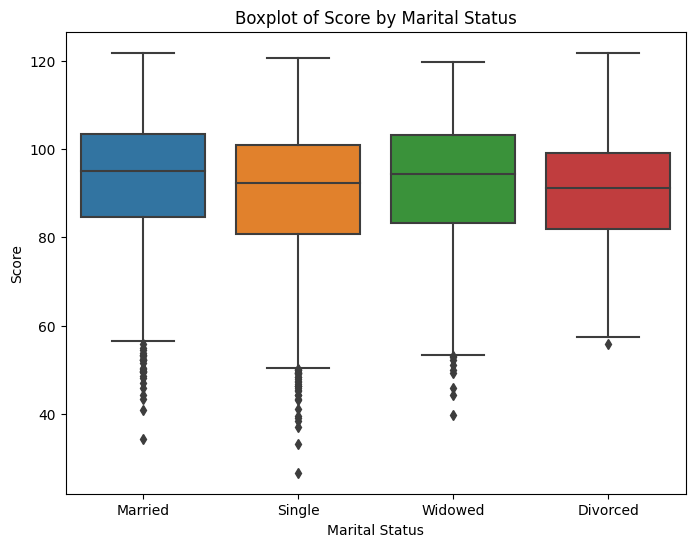

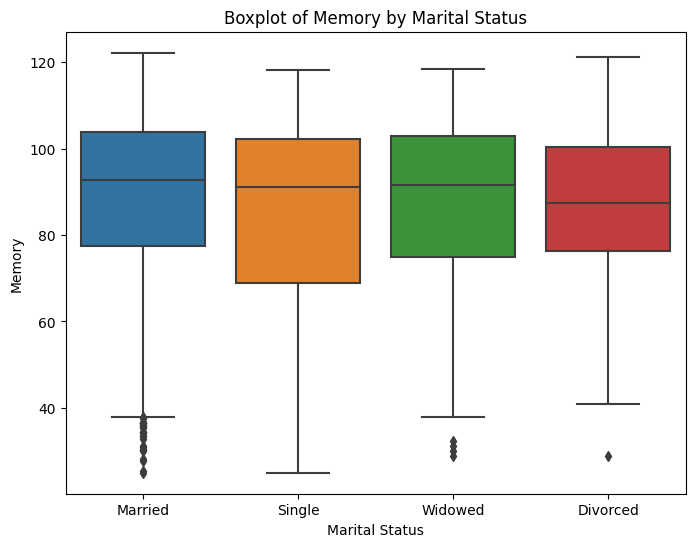

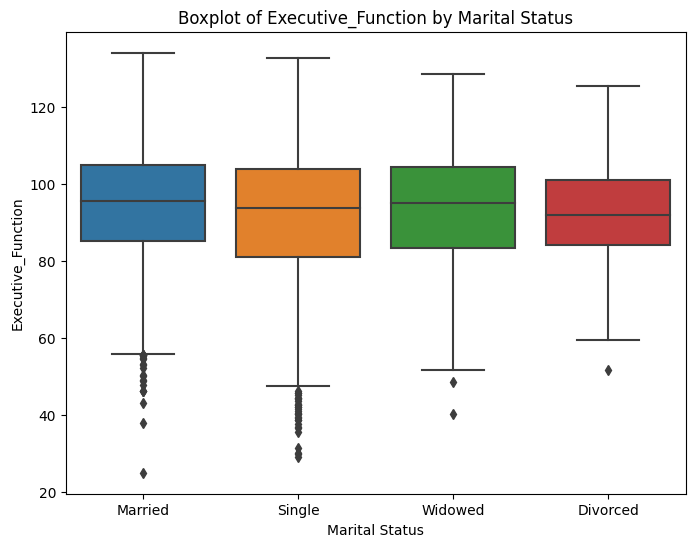

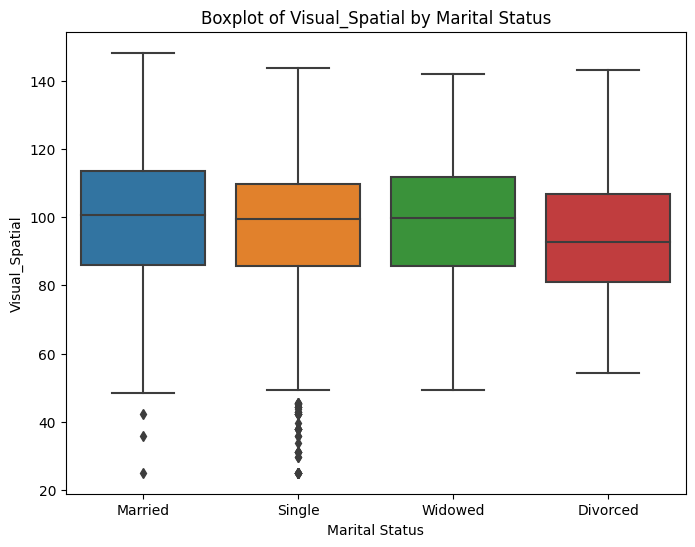

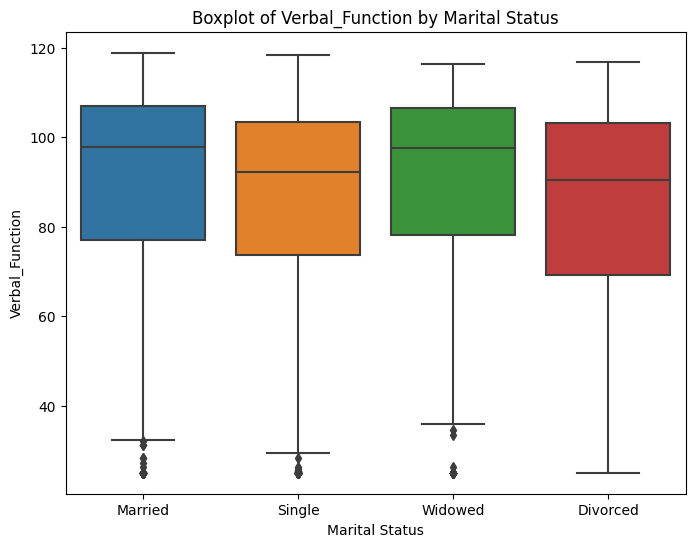

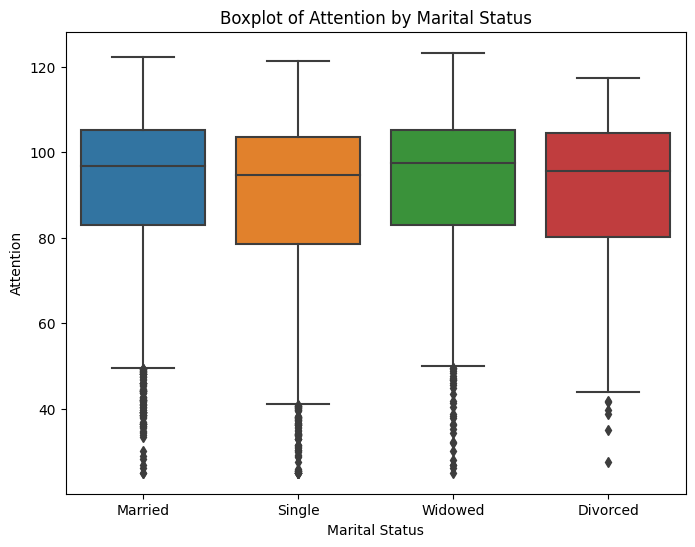

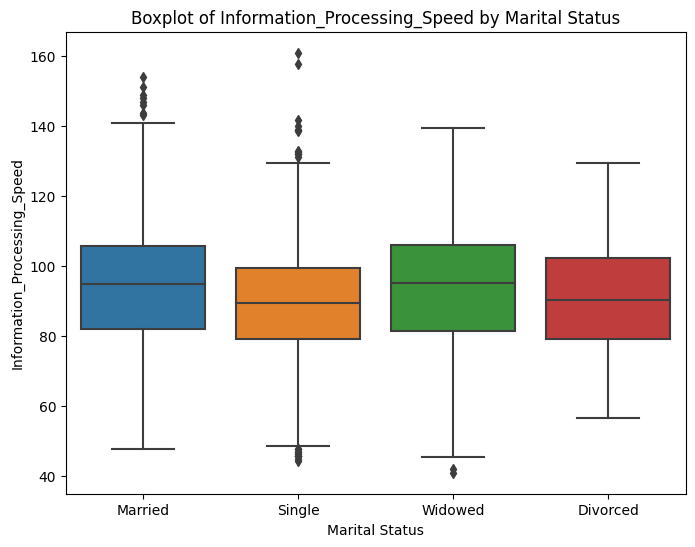

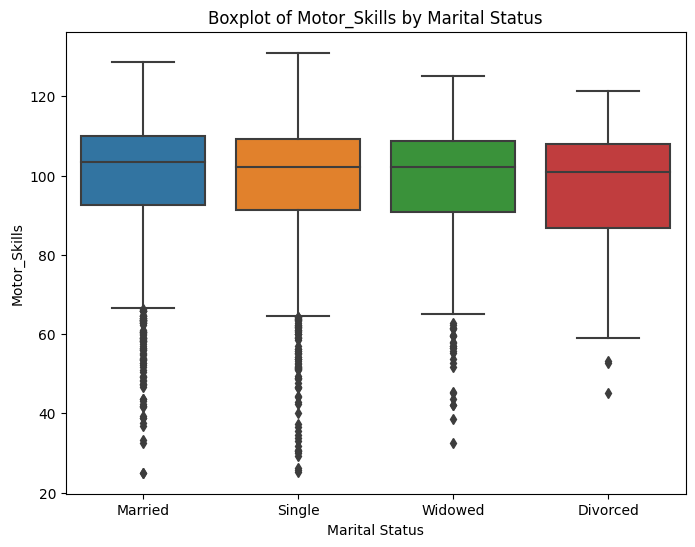

In [86]:
import seaborn as sns
import matplotlib.pyplot as plt

# List of continuous variables
continuous_vars = ['Score', 'Memory', 'Executive_Function', 'Visual_Spatial', 'Verbal_Function', 'Attention', 'Information_Processing_Speed', 'Motor_Skills']

# Creating boxplots for each variable by Marital_Status
for var in continuous_vars:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x='Marital_Status', y=var, data=unique_merged_df)
    plt.xlabel('Marital Status')
    plt.ylabel(var)
    plt.title(f'Boxplot of {var} by Marital Status')
    plt.show()


# **Tukey's HSD Test**

In [87]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# List of continuous variables
continuous_vars = ['Score', 'Memory', 'Executive_Function', 'Visual_Spatial', 'Verbal_Function', 'Attention', 'Information_Processing_Speed', 'Motor_Skills']

for var in continuous_vars:
    formula = f'{var} ~ C(Marital_Status)'
    model = ols(formula, data=unique_merged_df).fit()
    anova_table = sm.stats.anova_lm(model, typ=2)
    print(f"ANOVA for {var} and Marital_Status:")
    print(anova_table)

    # Tukey's HSD test is only meaningful if the ANOVA is significant
    if anova_table['PR(>F)'][0] < 0.05:
        mc = pairwise_tukeyhsd(endog=unique_merged_df[var], groups=unique_merged_df['Marital_Status'], alpha=0.05)
        print(f"Tukey's HSD Test for {var} and Marital_Status:")
        print(mc)


ANOVA for Score and Marital_Status:
                         sum_sq      df          F        PR(>F)
C(Marital_Status)  1.826466e+04     3.0  31.658246  2.580229e-20
Residual           1.305982e+06  6791.0        NaN           NaN
Tukey's HSD Test for Score and Marital_Status:
Multiple Comparison of Means - Tukey HSD, FWER=0.05
 group1   group2 meandiff p-adj lower upper reject
--------------------------------------------------
Divorced Married      nan   nan   nan   nan  False
Divorced  Single      nan   nan   nan   nan  False
Divorced Widowed      nan   nan   nan   nan  False
 Married  Single      nan   nan   nan   nan  False
 Married Widowed      nan   nan   nan   nan  False
  Single Widowed      nan   nan   nan   nan  False
--------------------------------------------------
ANOVA for Memory and Marital_Status:
                         sum_sq      df          F        PR(>F)
C(Marital_Status)  4.808639e+04     3.0  40.685519  4.749480e-26
Residual           2.668346e+06  6773.0     